In [10]:
# Import dependencies
import pandas as pd
import scipy.stats as st
import matplotlib
import csv
import os
import gmaps
import matplotlib.pyplot as plt
import numpy as np
import requests
import json

from api_keys import g_key

In [2]:
data_df = pd.read_csv("listings1.csv")
data_df = data_df.drop("neighbourhood_group", axis = 1)
data_df = data_df.dropna()
data_df.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
1,22787,"Sunny suite w/ queen size bed, inside boutique...",87973,Diego,Cuauhtémoc,19.44076,-99.16324,Private room,1969,1,57,2019-05-27,0.52,9,355
4,44616,CONDESA HAUS B&B,196253,Condesa Haus Bed & Breakfast CDMX,Cuauhtémoc,19.41006,-99.17645,Private room,1893,1,39,2019-05-02,0.42,10,334
5,58955,Entire beautiful duplex in la Roma,282620,Nat,Cuauhtémoc,19.42292,-99.15775,Entire home/apt,1625,3,39,2019-05-28,0.43,1,178
6,61792,Spacious Clean Quiet room (own bath) in la Con...,299558,Roberto,Cuauhtémoc,19.41259,-99.17959,Private room,956,2,51,2019-04-05,2.55,3,180
7,67703,"2 bedroom apt. deco bldg, Condesa",334451,Nicholas,Cuauhtémoc,19.41375,-99.17028,Entire home/apt,1816,2,39,2019-02-24,0.42,3,361


In [3]:
#data_df.groupby(data_df["neighbourhood"])["price"].mean()

In [4]:
#data_df.groupby(data_df["price"])["neighbourhood"].value_counts()

In [5]:
#data_df.groupby(data_df["room_type"])["price"].mean()

In [6]:
#data_df.groupby(data_df["minimum_nights"])["price"].mean()

In [7]:
#data_df.groupby(data_df["price"])["number_of_reviews"].mean()

In [8]:
#data_df.groupby(data_df["price"])["number_of_reviews"].sum()

In [21]:
locations = data_df[["latitude", "longitude"]]
price = data_df["price"]
max_int = data_df["price"].max()

In [24]:
# Plot Humidity heatmap
fig = gmaps.figure()

# Create a heat layer
heat_l = gmaps.heatmap_layer(locations, weights = price, max_intensity = max_int, point_radius = 10)

# Add the heat layer
fig.add_layer(heat_l)

# Display the plot
fig

Figure(layout=FigureLayout(height='420px'))

<function matplotlib.pyplot.show(*args, **kw)>

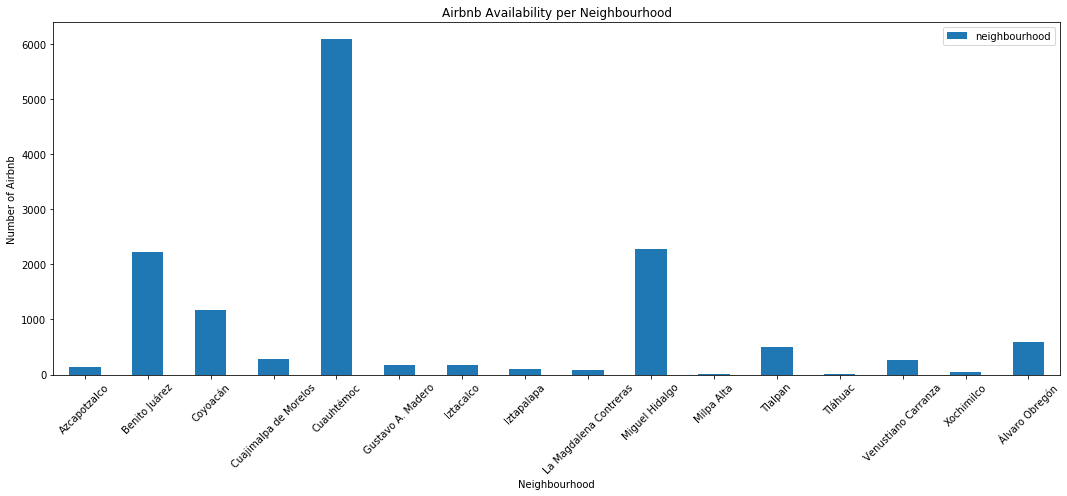

In [51]:
neighbourhood = data_df["neighbourhood"].value_counts().to_frame()
neighbourhood.sort_index().plot(kind = "bar", figsize = (15, 7))
plt.title("Airbnb Availability per Neighbourhood")
plt.xlabel("Neighbourhood")
plt.ylabel("Number of Airbnb")
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

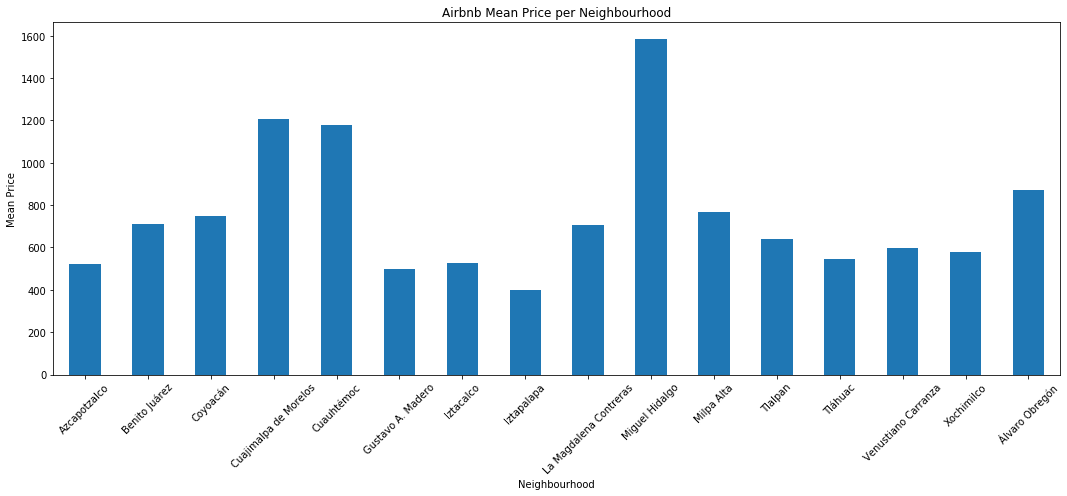

In [52]:
data_df.groupby(["neighbourhood"])["price"].mean().plot(kind = "bar", figsize = (15, 7))
plt.title("Airbnb Mean Price per Neighbourhood")
plt.xlabel("Neighbourhood")
plt.ylabel("Mean Price")
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

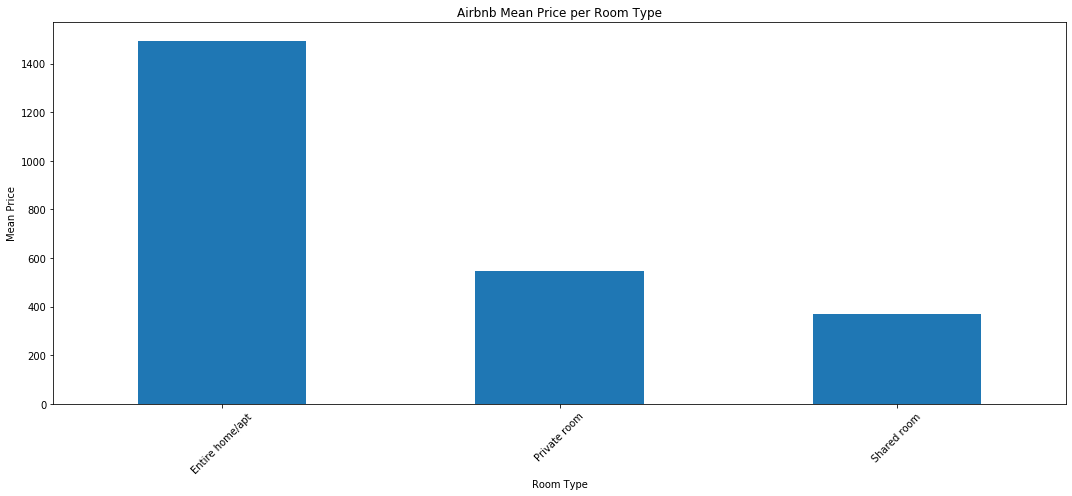

In [55]:
data_df.groupby(["room_type"])["price"].mean().plot(kind = "bar", figsize = (15, 7))
plt.title("Airbnb Mean Price per Room Type")
plt.xlabel("Room Type")
plt.ylabel("Mean Price")
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show

In [127]:
room = data_df.groupby(["neighbourhood"])["room_type"].value_counts().to_frame(name = "Count")
room = room.reset_index()
print(room)

ns = neighbourhood.sort_index()
index = ns.index

entire = room[room["room_type"] == "Entire home/apt"]["Count"]
entire = entire.to_frame(name = "Complete")
entire.index = index
#print(len(entire))

private = room[room["room_type"] == "Private room"]["Count"]
private = private.to_frame(name = "Private Room")
private.index = index
#print(private)

shared = room[room["room_type"] == "Shared room"]["Count"]
shared = shared.to_frame(name = "Shared Room")
#shared.index = index
print(shared)

room_t = pd.concat([entire, private], axis = 1, sort = True)
# # #roomt = room.T
room_t.head(16)

# data_df.groupby(["neighbourhood", "room_type"])["price"].mean().T.plot(kind = "bar", figsize = (25, 15))
# plt.title("Airbnb Mean Price per Room Type")
# plt.xlabel("Room Type")
# plt.ylabel("Mean Price")
# plt.xticks(rotation = 45)
# plt.tight_layout()
# plt.show

             neighbourhood        room_type  Count
0             Azcapotzalco     Private room     83
1             Azcapotzalco  Entire home/apt     47
2             Azcapotzalco      Shared room      2
3            Benito Juárez     Private room   1176
4            Benito Juárez  Entire home/apt   1022
5            Benito Juárez      Shared room     23
6                 Coyoacán     Private room    719
7                 Coyoacán  Entire home/apt    434
8                 Coyoacán      Shared room     23
9    Cuajimalpa de Morelos  Entire home/apt    162
10   Cuajimalpa de Morelos     Private room    119
11   Cuajimalpa de Morelos      Shared room      3
12              Cuauhtémoc  Entire home/apt   3781
13              Cuauhtémoc     Private room   2231
14              Cuauhtémoc      Shared room     80
15       Gustavo A. Madero     Private room    120
16       Gustavo A. Madero  Entire home/apt     56
17       Gustavo A. Madero      Shared room      5
18               Iztacalco     

,Complete,Private Room
Azcapotzalco,47,83
Benito Juárez,1022,1176
Coyoacán,434,719
Cuajimalpa de Morelos,162,119
Cuauhtémoc,3781,2231
Gustavo A. Madero,56,120
Iztacalco,78,83
Iztapalapa,28,74
La Magdalena Contreras,36,51
Miguel Hidalgo,1440,822
